## 1. OpenCV 함수를 이용하여 스테레오 정합 결과를 얻는 실험을 수행한다. 함수 수행 코드는 OpenCV 매뉴얼에서 찾을 수 있다.

- im2와 im6 영상을 이용하여 실험을 수행한다. 이 영상들은 color 이므로 실험 샘플 코드를 적절히 수정해야 한다.
cv.StereoBM.create 함수는 gray 영상에 대해서만 수행되므로 읽은 실험 영상을 gray로 바꾸어야 한다.
- 실험에서는 numDisparities=64 로 지정한다.
- blocksize를 5, 7, 11, 15로 바꾸어서 결과를 얻는다. block 크기가 결과에 어떤 영
향을 주는지 설명하라.

In [ ]:
use_colab = True
assert use_colab in [True, False]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


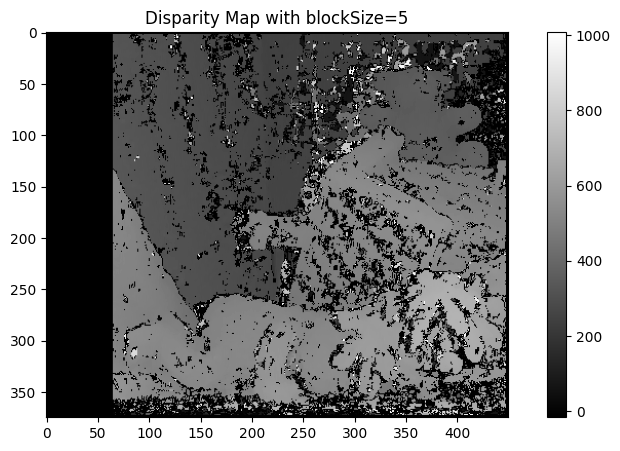

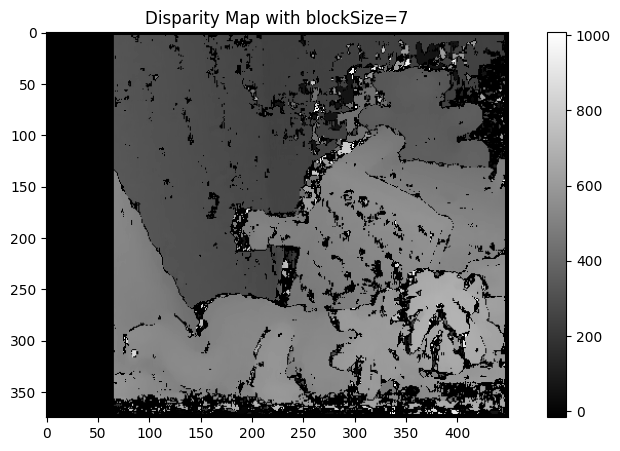

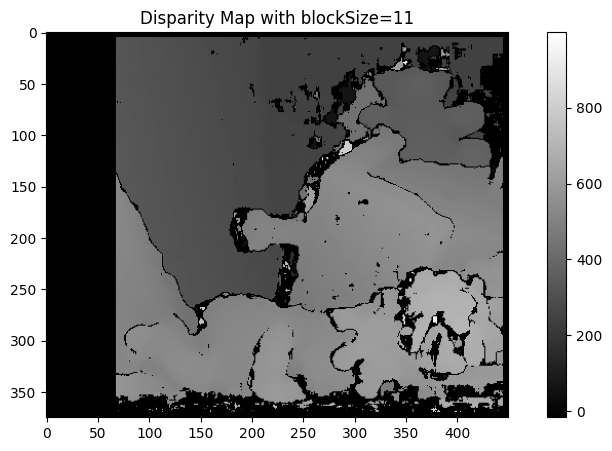

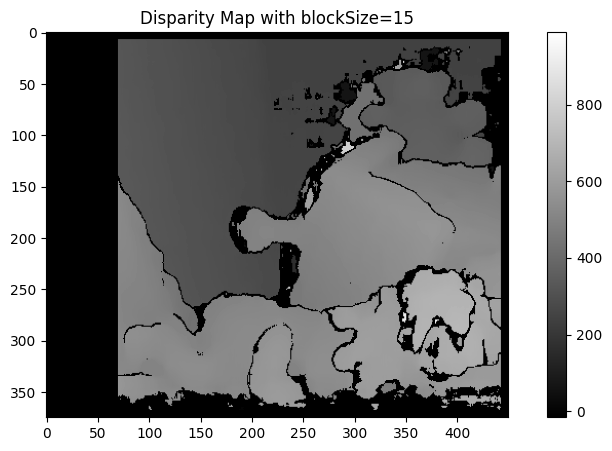

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

imgL_gray = cv.imread('/content/drive/MyDrive/dataset/im2.png', cv.IMREAD_GRAYSCALE)
imgR_gray = cv.imread('/content/drive/MyDrive/dataset/im6.png', cv.IMREAD_GRAYSCALE)

# 스테레오 매칭을 위한 파라미터 설정
numDisparities = 64  # disparity의 범위
blockSizes = [5, 7, 11, 15]  # 다양한 block size

# 각 block size에 대한 disparity 맵을 계산하고 시각화
for blockSize in blockSizes:
    stereo = cv.StereoBM.create(numDisparities=numDisparities, blockSize=blockSize)
    disparity = stereo.compute(imgL_gray, imgR_gray)

    plt.figure(figsize=(10, 5))
    plt.imshow(disparity, 'gray')
    plt.title(f'Disparity Map with blockSize={blockSize}')
    plt.colorbar()
    plt.show()

- blockSize=5: 작은 블록 크기는 더 세부적인 정합 결과를 제공하지만, 노이즈가 많아질 수 있습니다.
- blockSize=7: 중간 정도의 블록 크기는 적절한 세부 사항과 노이즈 수준의 균형을 맞춥니다.
- blockSize=11: 더 큰 블록 크기는 노이즈를 줄이지만, 세부 사항을 희생할 수 있습니다.
- blockSize=15: 매우 큰 블록 크기는 노이즈가 적지만, 정합이 부정확해질 수 있습니다. 즉, 경계가 부드러워지거나 작은 물체가 감지되지 않을 수 있습니다.

- 작은 blockSize (예: 5): 더 많은 세부 사항을 포착할 수 있지만 노이즈가 많이 발생하여 정합 결과가 불안정해질 수 있습니다. 특히 텍스처가 부족한 평평한 영역에서 잘못된 정합이 나타날 수 있습니다.
- 중간 blockSize (예: 7, 11): 작은 blockSize와 큰 blockSize의 장점을 적절히 절충하여 노이즈를 줄이면서도 비교적 세부 사항을 잘 유지합니다. 안정적인 정합 결과를 제공하지만 매우 작은 디테일은 약간 희석될 수 있습니다.
- 큰 blockSize (예: 15): 노이즈가 크게 줄어들어 평평한 영역이나 텍스처가 부족한 영역에서도 안정적인 정합이 가능하지만, 작은 세부 사항이 손실되고 경계가 부드러워져 정확한 경계 구분이 어려워질 수 있습니다.

- 결론은 blockSize가 작을수록 디테일이 살아나지만 노이즈가 많아지고, 클수록 노이즈가 줄어들지만 디테일이 희생됩니다.

## 2. LiDAR에 관한 동영상을 시청하고 다른 자료들도 검색하여 기능을 탐색하고 다음 물음을 설명하라.

#### a. LiDAR에서 3D 정보를 수집하는 원리를 설명하라. 측정된 거리의 정확도는 얼마인가?

- LiDAR 시스템은 레이저 발사기, 수신기, 그리고 정확한 시간 측정 장치로 구성됩니다. 그 원리는 다음과 같습니다:

- LiDAR 장치는 짧은 펄스 형태의 레이저 빛을 발사합니다.
- 레이저 빛이 물체에 닿으면 반사되어 돌아옵니다.
- LiDAR의 수신기는 반사된 레이저 빛을 감지합니다.
- 레이저가 발사된 시점부터 반사된 빛이 돌아오는 시점까지의 시간을 측정합니다.
- 그리고 시간과 빛의 속도를 이용하여 물체까지의 거리를 계산합니다.
- 거리는 시간과 빛의 속도(𝑐)를 이용하여
𝑑=𝑐𝑡/2 로 계산됩니다.

#### 측정된 거리의 정확도

- LiDAR의 정확도는 일반적으로 센티미터 수준의 정확도를 가지고 있습니다.
- 고급 LiDAR 시스템의 경우, 거리 측정 정확도는 약 1~3 센티미터 정도입니다.



#### b. LiDAR 장치가 회전하는 이유를 설명하라. 이 장치는 초당 몇 장의 영상을 처리하는가?

- 회전을 통해 LiDAR는 모든 방향을 스캔할 수 있어 주변 환경의 전체적인 3D 맵을 생성할 수 있습니다.
- 고정된 장치로는 한 방향만 스캔할 수 있기 때문에, 회전함으로써 전방위 데이터를 얻을 수 있습니다.
- 회전하면서 많은 데이터를 빠르게 수집하여 높은 해상도의 3D 이미지를 생성할 수 있습니다.
- 회전하면서 실시간으로 데이터를 수집 및 업데이트하여 동적인 환경에서도 정확한 3D 정보를 제공합니다.

- LiDAR 장치의 처리 속도는 일반적으로 초당 수십만 개의 포인트를 스캔할 수 있습니다.
- 이를 통해 LiDAR는 초당 여러 프레임의 3D 포인트 클라우드를 생성할 수 있습니다.
- 예를 들어, 고성능 LiDAR 시스템은 초당 약 1백만 개 이상의 포인트를 수집할 수 있으며, 이는 대략 10에서 30 프레임에 해당합니다.

## 3. 수업자료 12장 35쪽에 나와 있는 Laser 센서는 Lidar와 다른 방식으로 작동한다.

#### a. 이 방식에서는 거리를 어떻게 측정하는지 설명하라.
#### b. 이 방식을 LiDAR와 비교했을 때의 장단점을 설명하라.

**a. Laser 센서의 거리 측정 원리**

1. **Laser 발사**: Laser 센서는 레이저 빛을 발사합니다.
2. **반사**: 레이저 빛이 목표 물체에 닿아 반사됩니다.
3. **수신**: 센서의 수신기가 반사된 레이저 빛을 감지합니다.
4. **삼각측량**: 반사된 빛의 위치와 각도를 측정하여 거리를 계산합니다. Laser 발사기, 반사된 빛을 수신하는 검출기, 그리고 레이저 빛이 목표물에 닿아 반사되는 지점 간의 삼각형을 형성합니다. 이 삼각형의 기하학적 속성을 이용하여 목표물까지의 거리를 계산합니다.

**b. LiDAR와 Triangulation 방식의 장단점 비교**

### LiDAR 방식

**장점**:
1. **장거리 측정 가능**: 수백 미터 이상의 거리까지도 정확하게 측정할 수 있습니다.
2. **3D 정보 제공**: 회전 또는 멀티채널 시스템을 사용하여 360도 전방위의 3D 포인트 클라우드를 생성할 수 있습니다.
3. **정밀한 거리 측정**: 일반적으로 1~3 센티미터 수준의 높은 정확도를 제공합니다.

**단점**:
1. **비용**: 고성능 LiDAR 시스템은 매우 비쌉니다.
2. **복잡성**: 회전 및 정밀 타이밍 측정이 필요하여 시스템이 복잡하고 유지보수가 어려울 수 있습니다.
3. **날씨와 환경에 민감**: 안개, 비, 눈 등 기상 조건에 영향을 받을 수 있습니다.